#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#load dataset

In [2]:

data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

#Checking null values

In [6]:
data.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#Deleting Unnnecessary Columns

In [7]:
df=data.drop(['url','phone'],axis=1)


In [8]:
df.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

#check duplicate values

In [9]:
df.duplicated().sum()

43

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

#removing null values

In [12]:

# Replace missing values in numeric columns with the mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Replace missing values in categorical columns with the most frequent value or a specific value
categorical_cols = df.select_dtypes(exclude='number').columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())  # Replace with 'Unknown' or df.mode() as needed

# Take a random sample of 50% of the DataFrame rows
sampled_df = df.sample(frac=0.5, random_state=1)

In [13]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [14]:
df.shape

(23395, 15)

#heatmap


In [15]:
df.info

<bound method DataFrame.info of                                                  address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51705  2nd Floor, Iona, Virginia Mall, Whitefield Mai...   
51707  Bengaluru Marriott Hotel, 75, 8th Road, EPIP A...   
51708  Keys Hotel, 6, 1st Phase Industrial Area, Near...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                           

In [16]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

#renaming columns

In [17]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [18]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#unique values in cost column

In [19]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

#removing unused data

In [20]:
df = df.loc[df.cost !='UnKnown']

In [21]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

#convert the result to float

In [22]:
df['cost'] = pd.to_numeric(df['cost'].str.replace(',',''), errors='coerce').fillna(0).astype(float)

In [23]:
print(df['cost'].unique())

print('---'*10)


[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


#unique values in rating column

In [24]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#removing unnecesary data

In [25]:
df = df.loc[df.rate !='NEW']

In [26]:
df = df.loc[df.rate !='Unknown']

#removing /5 

In [27]:
df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [28]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

#visualisations

#Restaurants delivering Online or not

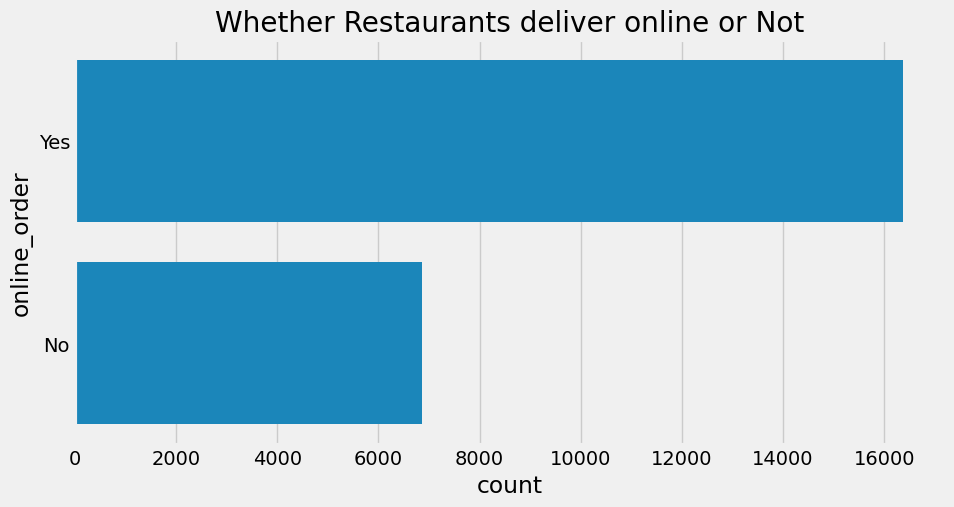

In [29]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()

#Book table

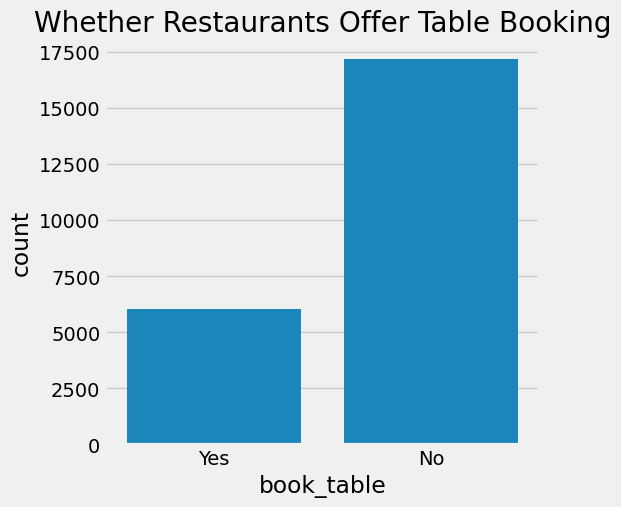

In [30]:
sns.countplot(x='book_table', data=df)
fig = plt.gcf()
fig.set_size_inches(5, 5)
plt.title('Whether Restaurants Offer Table Booking')
plt.show()


#types of restaurants

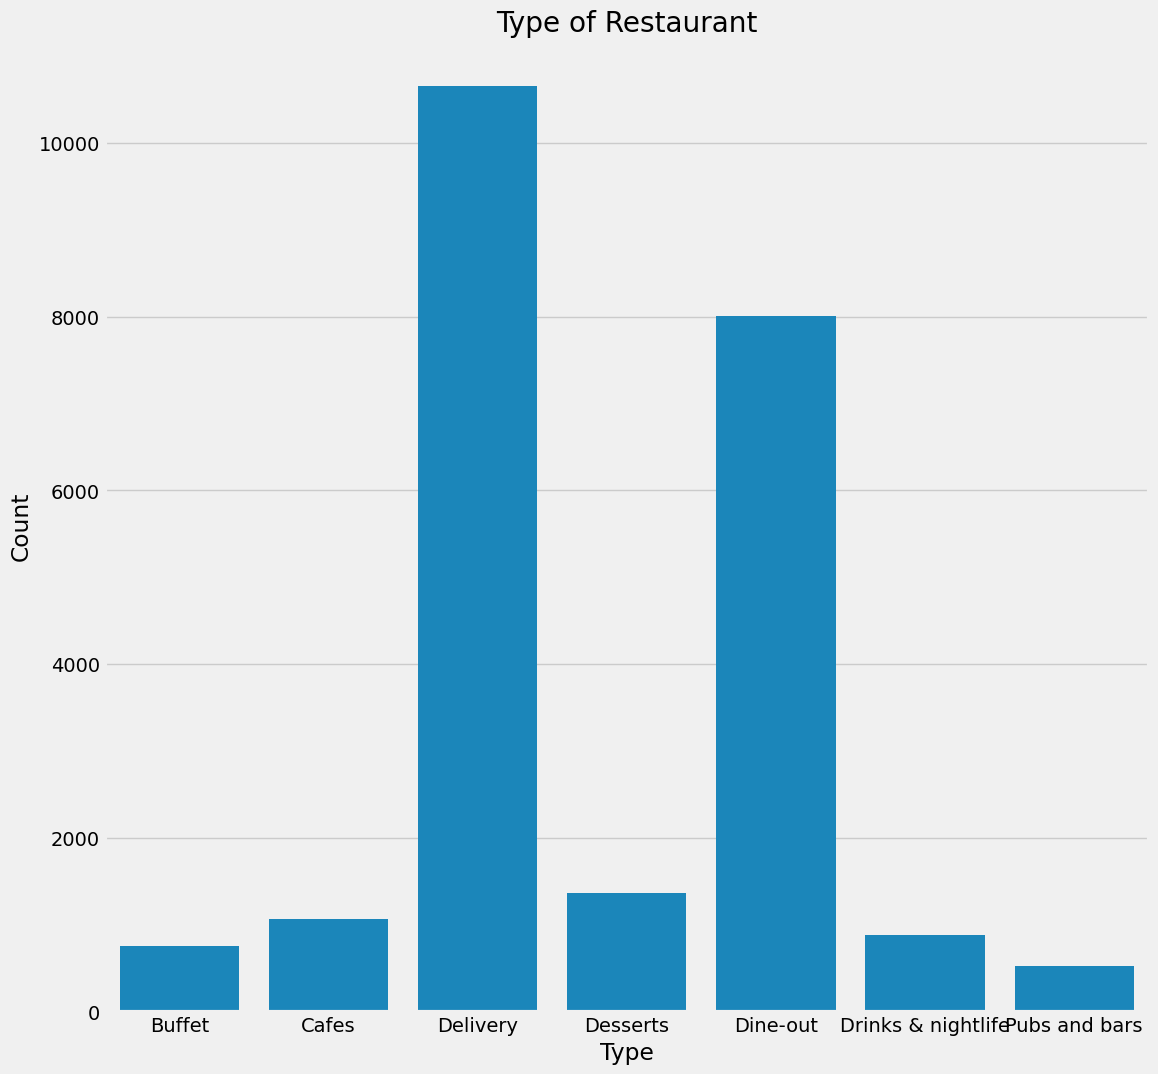

In [31]:
sns.countplot(x='type', data=df)
plt.title('Type of Restaurant')
plt.xlabel('Type')
plt.ylabel('Count')

fig = plt.gcf()
fig.set_size_inches(12, 12)

plt.show()


#most famous restaurants

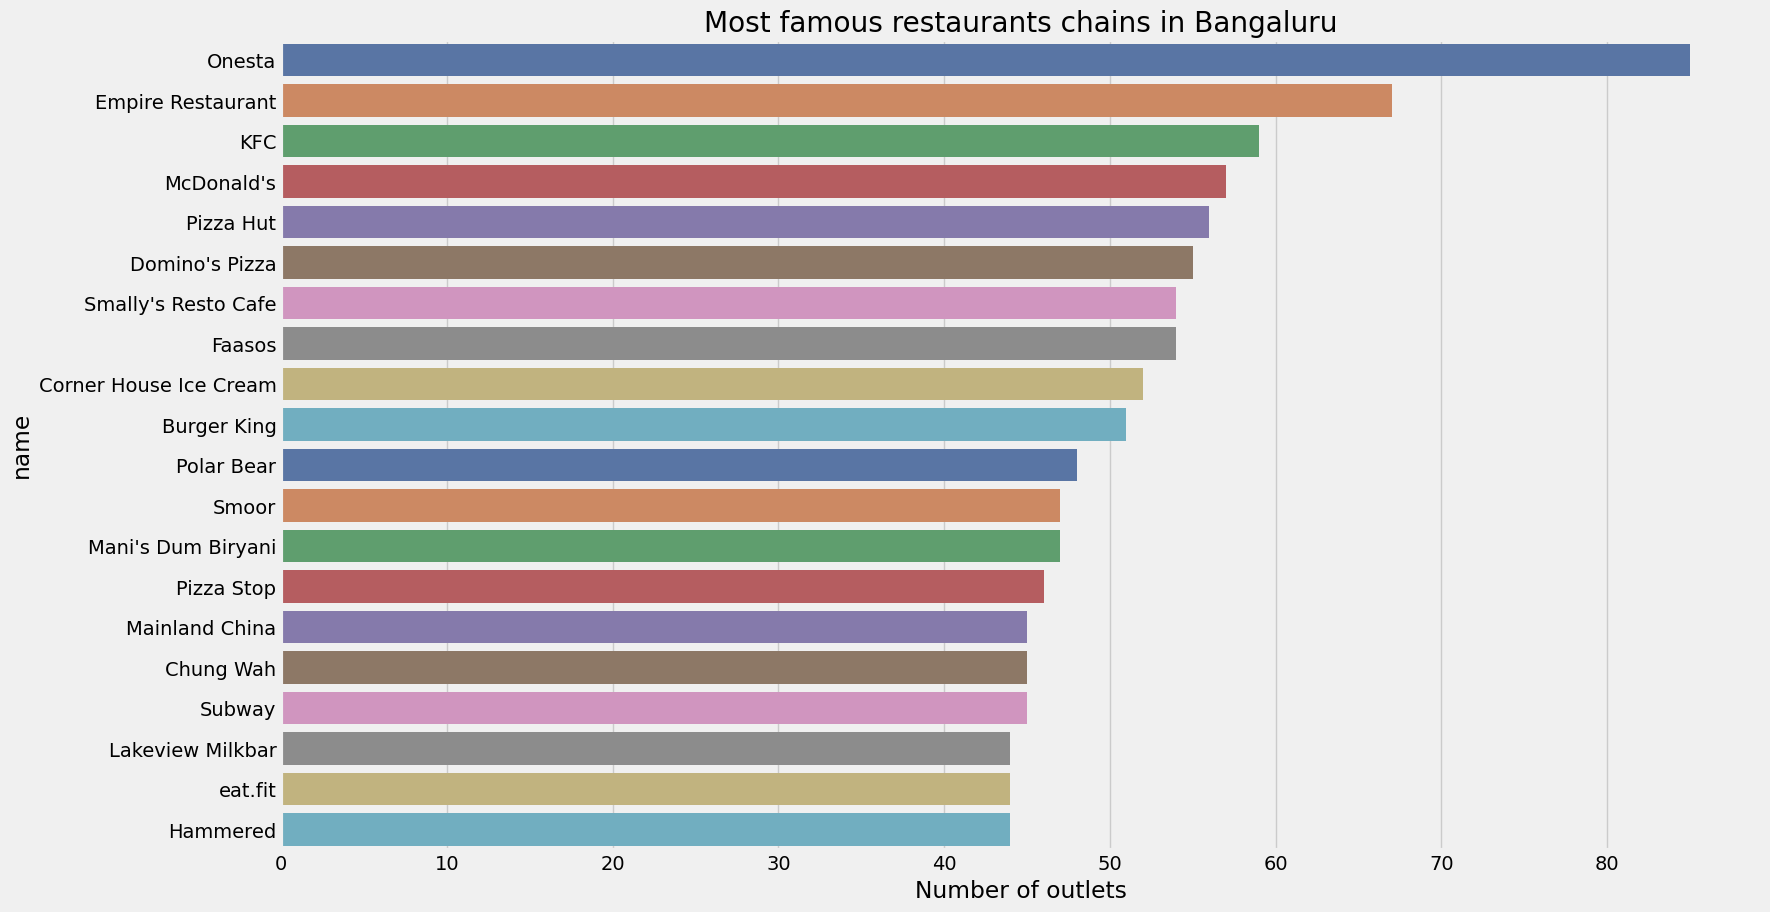

In [32]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

#rating distribution

<Figure size 1500x1500 with 0 Axes>

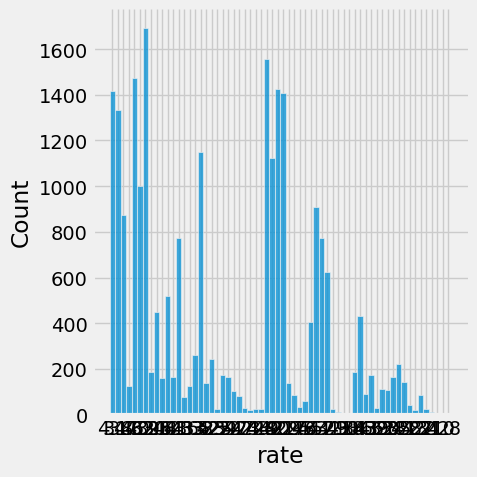

In [33]:
plt.figure(figsize=(15,15))

sns.displot(df['rate'],bins=20)

In [34]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [35]:
df = df.loc[df.rate !='-']

In [36]:
df['rate'].min()

'1.8'

In [37]:
df['rate'].max()

'4.9 '

In [38]:
df['rate']=df['rate'].astype(float)

In [39]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [40]:
((df['rate']>=2) & (df['rate']<3)).sum()

1179

In [41]:
((df['rate']>=3) & (df['rate']<4)).sum()

10153

In [42]:
(df['rate']>=4).sum()

11911

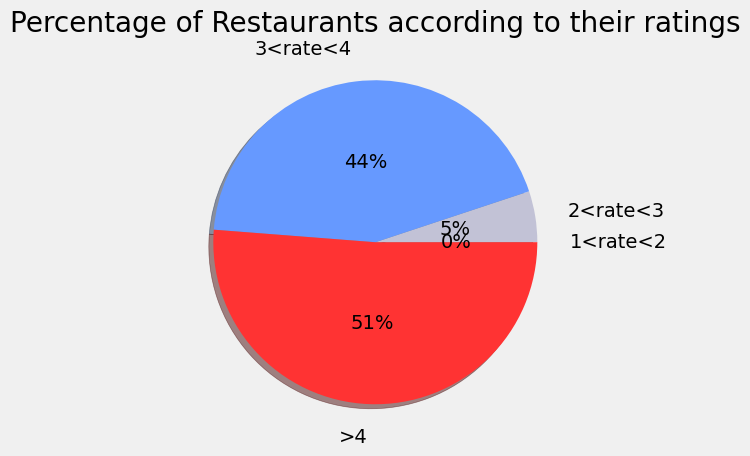

In [43]:
slices=[((df['rate']>=1) & (df['rate']<2)).sum(),
        ((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()
        ]

labels=['1<rate<2','2<rate<3','3<rate<4','>4']
colors = ['#ff3333','#c2c2d6','#6699ff']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings")

fig.set_size_inches(5,5)
plt.show()

#model construction

In [44]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


#convert the online catergorical variables into numeric format

In [45]:
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [46]:
df.online_order.value_counts()

online_order
1    16378
0     6870
Name: count, dtype: int64

In [47]:
df.online_order = pd.to_numeric(df.online_order)

#change string catergorical into catergorical int

In [48]:
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

In [49]:
df.book_table = pd.to_numeric(df.book_table)

In [50]:
df.book_table.value_counts()

book_table
0    17191
1     6057
Name: count, dtype: int64

#label encode the catergorical variables to make easier in model building

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [52]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [53]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,16,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",484,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",5047,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,62,Masala Dosa,1587,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",5047,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,4,20,"Panipuri, Gol Gappe",1406,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",5047,Buffet,Banashankari


In [54]:
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('Zomato_df.csv')

In [55]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047
2,1,0,918,1,16,484,800.0,5047
3,0,0,88,1,62,1587,300.0,5047
4,0,0,166,4,20,1406,600.0,5047


#heatmap

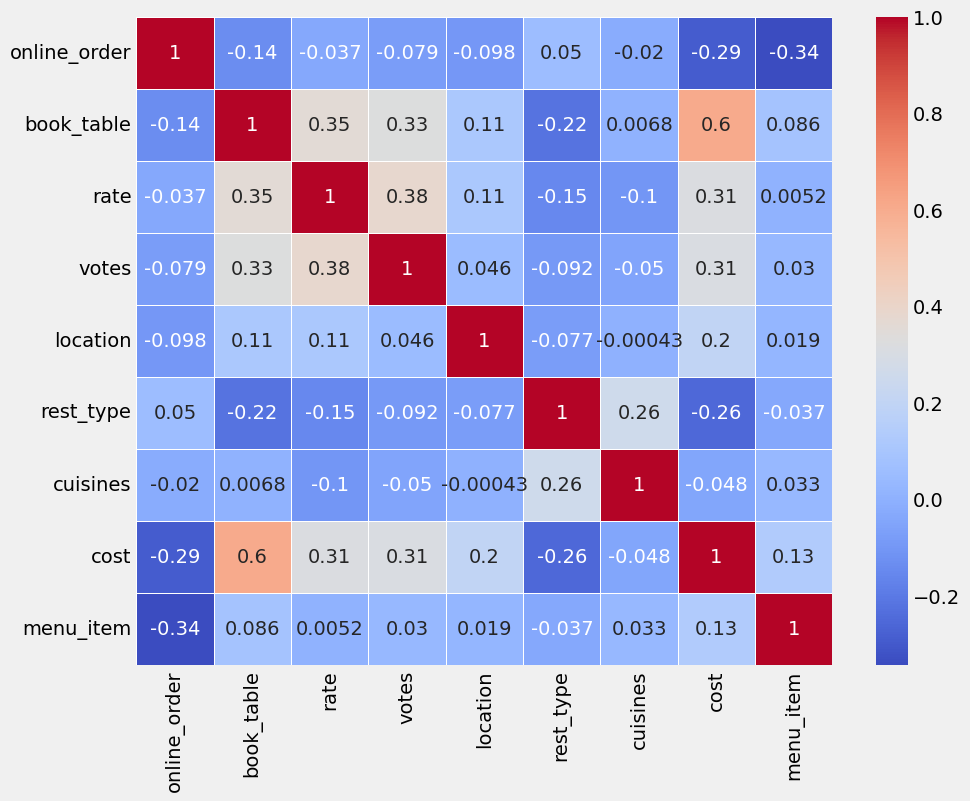

In [56]:
# Select numeric columns for the correlation matrix
numeric_cols = df.select_dtypes(include='number').columns
features_for_heatmap = numeric_cols

# Create a correlation matrix
correlation_matrix =df[features_for_heatmap].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Show the plot
plt.show()


In [57]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

#spliting the dataset

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)
print("X_train:")
print(x_train.head(5))
print("\nX_test:")
print(x_test.head(5))

X_train:
       online_order  book_table  votes  location  rest_type  cuisines    cost  \
38077             1           1    232        49          5       122  2000.0   
12580             1           1   3485        48         61       646  1700.0   
50065             1           1    977        71         57       669  1500.0   
11049             0           0    118        30         20      1185   800.0   
48098             0           1    497        65         54      1124  2000.0   

       menu_item  
38077       5047  
12580       5047  
50065       1171  
11049       5047  
48098       5047  

X_test:
       online_order  book_table  votes  location  rest_type  cuisines    cost  \
24270             1           0    722        35         13       374  1000.0   
22002             1           0     47        28         69      1121   100.0   
47263             0           0    118        66         20       602   650.0   
32562             1           0    169        42         

In [59]:
x_train.shape
x_test.shape


(6975, 8)

In [60]:
print("y_train:")
print(y_train.head(5))
print("\ny_test:")
print(y_test.head(5))

y_train:
38077    4.4
12580    4.3
50065    4.0
11049    3.9
48098    4.3
Name: rate, dtype: float64

y_test:
24270    4.0
22002    3.9
47263    2.3
32562    4.0
20805    4.4
Name: rate, dtype: float64


#Linear regression

In [61]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred=lr_model.predict(x_test)
residuals = y_test - y_pred
mae = abs(residuals).mean()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)


Absolute Error:  0.265928622923506
Mean Squared Error:  0.14084749853015288
R2 Score:  0.22818828522967083


#random-forest regression

In [62]:
RF_Model = RandomForestRegressor(n_estimators=650, random_state=245, min_samples_leaf=0.0001)
RF_Model.fit(x_train, y_train)
y_predict = RF_Model.predict(x_test)
mae = abs(y_test - y_predict).mean()
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print("Absolute Error: ", mae)
print("Mean Squared Error: ", mse)
print("R2 Score: ", r2)

Absolute Error:  0.07090070759188608
Mean Squared Error:  0.021721052933640832
R2 Score:  0.880973653871876


#SVM REGRESSOR

In [63]:
# Import necessary libraries
from sklearn.svm import SVR

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

# Initialize the Support Vector Machine (SVM) model with a regression kernel
svm_model = SVR()

# Train the model
svm_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(x_test)

# Calculate metrics
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)
r2_score_val = r2_score(y_test, y_pred)

# Display the results
print(f"Absolute Error: {absolute_error}")
print(f"Mean Squared Error: {mean_squared_error_val}")
print(f"R2 Score: {r2_score_val}")


Absolute Error: 0.24595382272657884
Mean Squared Error: 0.13972398630518626
R2 Score: 0.24075679593489885


#KNN REGRESSOR

In [64]:

from sklearn.neighbors import KNeighborsRegressor

# create KNN regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

# fit the model to the training data
knn_reg.fit(x_train, y_train)

# make predictions
y_pred = knn_reg.predict(x_test)

# calculate and print the absolute error
abs_error = mean_absolute_error(y_test, y_pred)
print("Absolute error: ", abs_error)

# calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

# calculate and print the R-squared score
r2 = r2_score(y_test, y_pred)
print("R2 score: ", r2)

Absolute error:  0.16151397849462365
Mean squared error:  0.0775942652329749
R2 score:  0.5783621687983975


#Ridge Regressior
 

In [65]:
# Import necessary libraries

from sklearn.linear_model import Ridge


# Create and fit the Ridge Regression model
alpha = 1.0  # Regularization strength
ridge_regressor = Ridge(alpha=alpha)
ridge_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = ridge_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')

Absolute Error: 0.2653483508891779
Mean Squared Error: 0.14344982913872556
R2 Score: 0.22051101762879877


#Lasso regressor

In [66]:
# Import necessary libraries
from sklearn.linear_model import Lasso
# Create and fit the Lasso Regression model
alpha = 1.0  # Regularization strength
lasso_regressor = Lasso(alpha=alpha)
lasso_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = lasso_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')

Absolute Error: 0.2692793635371879
Mean Squared Error: 0.14954550562666918
R2 Score: 0.1873878505188804


#elastic net regressor

In [67]:

from sklearn.linear_model import ElasticNet
alpha = 1.0  # Regularization strength
l1_ratio = 0.5  # Mix ratio between L1 and L2 regularization
elastic_net_regressor = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
elastic_net_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = elastic_net_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')
print(f'R2 Score: {r2:}')


Absolute Error: 0.26927167902473503
Mean Squared Error: 0.14945562835909176
R2 Score: 0.18787623269586085


#Bayesian Regressor

In [68]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

bayesian_regressor = BayesianRidge()
bayesian_regressor.fit(x_train, y_train.ravel())  # The ravel() method is used to convert y_train to a 1D array

# Make predictions on the test set
y_pred = bayesian_regressor.predict(x_test)

# Calculate R2 score, absolute error, and mean squared error
r2 = r2_score(y_test, y_pred)
absolute_error = mean_absolute_error(y_test, y_pred)
mean_squared_error_val = mean_squared_error(y_test, y_pred)

# Print the results
print(f'R2 Score: {r2:}')
print(f'Absolute Error: {absolute_error:}')
print(f'Mean Squared Error: {mean_squared_error_val:}')


R2 Score: 0.22051911306285066
Absolute Error: 0.2652701297703006
Mean Squared Error: 0.143448339331098


#EXTRA TREE REGRESSION

In [69]:
model = ExtraTreesRegressor()
x=model
extra=x

# Train the model
x.fit(x_train, y_train)

# Make predictions on the test set
predictions = x.predict(x_test)

# calculate and print the absolute error
abs_error = mean_absolute_error(y_test,predictions)
print("Absolute error: ", abs_error)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# calculate and print the R-squared score
r2 = r2_score(y_test, predictions)
print("R2 score: ", r2)
print(x)

Absolute error:  0.03336237958696361
Mean Squared Error: 0.01271015014843181
R2 score:  0.9309345848338018
ExtraTreesRegressor()


#bargraph

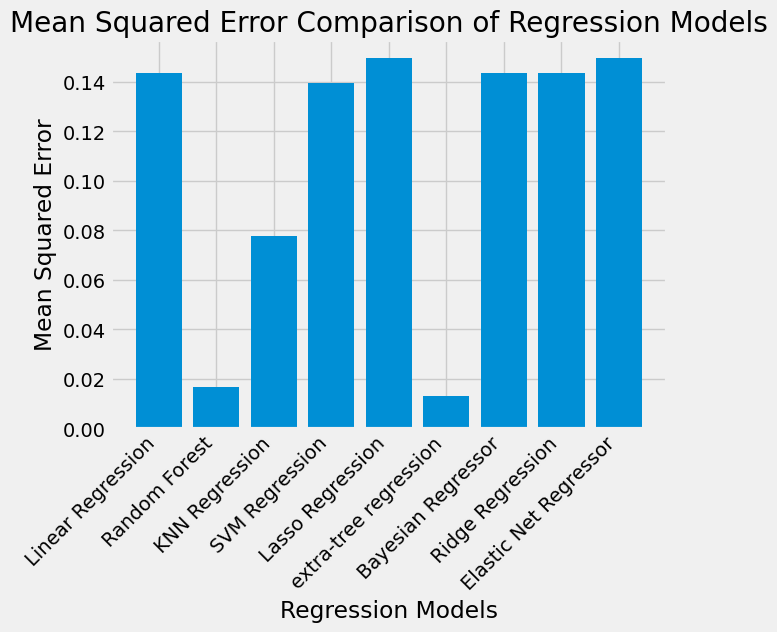

In [70]:
# Initialize regression modelsa
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'KNN Regression': KNeighborsRegressor(),
    'SVM Regression': SVR(),
    'Lasso Regression': Lasso(),
    'extra-tree regression' : ExtraTreesRegressor(),
    'Bayesian Regressor': BayesianRidge(),
    'Ridge Regression': Ridge(),
    'Elastic Net Regressor': ElasticNet()
}

# Train and evaluate each model
mse_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse

# Plot the MSE scores in a bar graph
plt.bar(mse_scores.keys(), mse_scores.values())
plt.title('Mean Squared Error Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45, ha='right')
plt.show()


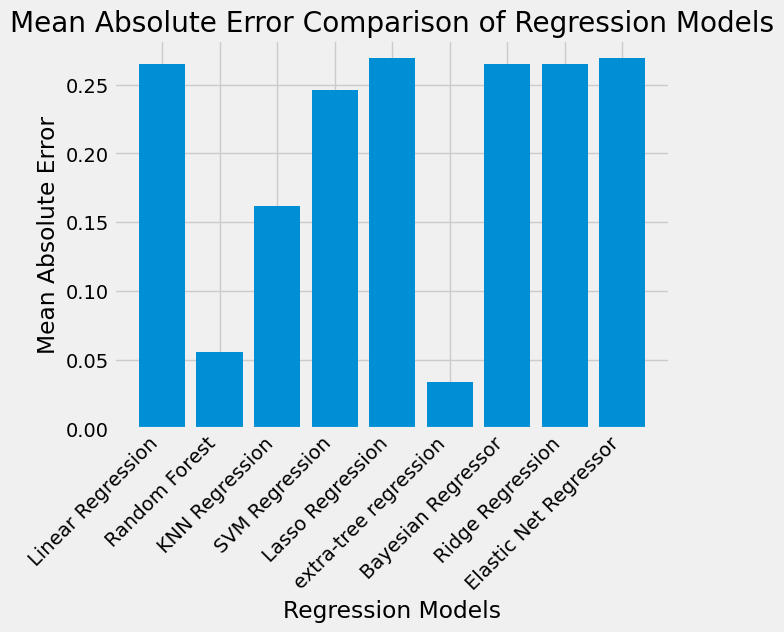

In [71]:
# Train and evaluate each model
absolute_error_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    absolute_error = mean_absolute_error(y_test, y_pred)
    absolute_error_scores[model_name] = absolute_error

# Plot the Absolute Error scores in a bar graph
plt.bar(absolute_error_scores.keys(), absolute_error_scores.values())
plt.title('Mean Absolute Error Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45, ha='right')
plt.show()


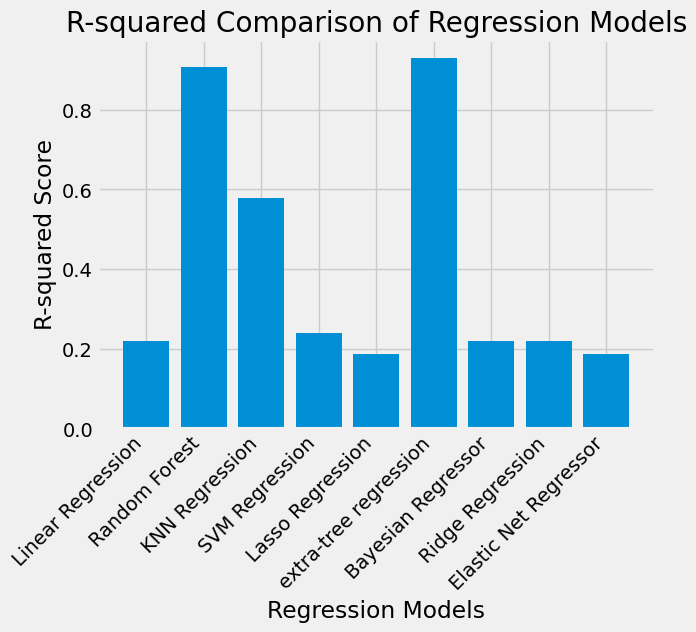

In [72]:
# Train and evaluate each model
r2_scores = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores[model_name] = r2

# Plot the R-squared scores in a bar graph
plt.bar(r2_scores.keys(), r2_scores.values())
plt.title('R-squared Comparison of Regression Models')
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()


#model saving

In [73]:
import joblib
joblib.dump(extra,'mymodel.pkl')


['mymodel.pkl']